<a href="https://colab.research.google.com/github/ckzj12/Tensorflow2.0_Regression_example/blob/master/HosingPrice_ManualNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow 2.0 - Custom training example

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Now, import the tensorflow

먼저 텐서플로우 라이브러리를 Import 합니다.

In [0]:
import tensorflow as tf

print('Tensorflow verstion : {}'.format(tf.__version__))

Tensorflow verstion : 2.0.0


Set the path to the dataset (modify it to your own path)

데이터셋이 저장되어 있는 경로를 지정해줍니다.

In [0]:
dataset_path = "C:\\Users\\jaehle\\Downloads\\Python\\ML\\HousingPrice_ManualNet\\train_reduced.csv"

Import data using pandas

pandas 라이브러리를 이용해서 csv 파일을 import 합니다.

In [0]:
raw_dataset = pd.read_csv(dataset_path)

In [0]:
dataset = raw_dataset.copy()
dataset.pop("Id") # remove the column named "Id" since it is just an ID.
dataset.tail()

,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice
1455,7917,6,5,1999,175000
1456,13175,6,6,1978,210000
1457,9042,7,9,1941,266500
1458,9717,5,6,1950,142125
1459,9937,5,6,1965,147500


## Prepare training data

In [0]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [0]:
train_stats = train_dataset.describe()
#train_stats.pop("SalePrice")
train_stats = train_stats.transpose()
train_stats
#for num, a in enumerate(train_stats['count']):
#    if a != 1168:
#        print('ID: {}, count: {}'.format(train_dataset.columns[num+1],a))

,count,mean,std,min,25%,50%,75%,max
LotArea,1168.0,10549.443493,9906.540386,1477.0,7526.25,9522.5,11649.75,215245.0
OverallQual,1168.0,6.153253,1.403743,1.0,5.00,6.0,7.00,10.0
OverallCond,1168.0,5.586473,1.124345,1.0,5.00,5.0,6.00,9.0
YearBuilt,1168.0,1971.179795,30.936320,1872.0,1951.75,1973.0,2001.00,2010.0
SalePrice,1168.0,183474.327911,81395.422704,34900.0,130875.00,164995.0,216209.25,755000.0


Normalize the data (with standard deviation and mean)

데이터를 정규화 (Normalize) 합니다. 여기서는 표준편차와 평균값을 이용하여 정규화 했습니다.

In [0]:
def norm(x):
    #return x
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Set the label (target) data : in this example, it will be 'SalePrice'

라벨 (타겟) 데이터를 설정합니다. 이 예제에서는 'SalePrice' 열이 라벨이 됩니다.

In [0]:
normed_train_labels = normed_train_data[['SalePrice']]
normed_test_labels = normed_test_data[['SalePrice']]

In [0]:
normed_train_data.tail()

,LotArea,OverallQual,OverallCond,YearBuilt,SalePrice
1168,0.320854,-0.109175,1.257200,-1.169493,0.633029
455,-0.095840,0.603206,0.367794,0.058837,-0.097970
584,-0.447123,-1.533937,1.257200,-1.169493,-0.620113
147,-0.105430,0.603206,-0.521612,0.963922,0.479458
160,0.057594,-0.109175,0.367794,0.414406,-0.257684


In [0]:
normed_train_labels.tail()

,SalePrice
1168,0.633029
455,-0.097970
584,-0.620113
147,0.479458
160,-0.257684


In [0]:
dummy = normed_train_data.pop('SalePrice')
dummy = normed_test_data.pop('SalePrice')

## Build the model

Model can easily be built with tf.keras library. <br> In this example, simple feed-forward neural network will be built

모델은 케라스 라이브러리를 이용해서 쉽게 생성이 가능합니다. <br> 이 예제에서는 간단한 Feed-forward neural network 를 생성해보겠습니다.

In [0]:
model = tf.keras.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=[len(normed_train_data.keys())]),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
          ])

First hidden layer has 64 neurons, and input shapes are designated as 4 (= len(normed_train_data.keys())) <br> Second hidden layer has 32 neurons and it is not necessary to assign the input shape since the keras library will automatically decide the input shape as 64 (based on the number of neurons from previous hidden layer) <br> Lastly, the output layer has only one neuron which will give the prediction of "SalePrice".

모델을 생성할 때, 첫번째 히든 레이어에는 64개의 뉴런을 생성했고, 인풋의 크기 또한 설정했습니다. (인풋 크기 = 4 (= len(normed_train_data.keys())) <br> 
두번째 히든 레이어에는 32개의 뉴런을 생성했구요, 여기서는 케라스 라이브러리가 자동으로 이전 히든 레이어의 아웃풋 크기를 이용해서 인풋 크기를 결정하므로 따로 인풋 크기를 설정하지 않았습니다. <br>
마지막으로 아웃풋 레이어에는 하나의 뉴런이 있고, 이 뉴런이 "SalePrice"를 예측하게 됩니다.

We can check the generated model structures with summary() method

그리고 만들어진 모델은 아래와 같이 summary() 메소드로 확인이 가능합니다.

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 2,433
Trainable params: 2,433
Non-trainable params: 0
_________________________________________________________________


## Set up the loss

Loss can be set by using tf.keras library. For available losses, please have a look at the keras website: https://keras.io/losses/ <br> In here, user can also set up their own loss functions. You can find it in one of my posting about Gradient descent: <br>
Even though it is not used, the commented cell below is the example.

손실함수 또한 케라스 라이브러리를 이용해서 설정이 가능합니다. 케라스 홈페이지에 라이브러리로 설정 가능한 손실함수를 확인하실 수 있습니다. 링크 : https://keras.io/losses/ <br> 유저가 직접 손실 함수를 정의하는 것도 가능한데요, 경사 하강법 (Gradient descent) 포스팅에서 그 예제를 확인하실 수 있습니다. 링크 : <br>
이 예제에서 사용되지는 않았지만, 코멘트 처리되어 있는 셀에 있는 것처럼 손실 함수 적용이 가능합니다.

In [0]:
loss_object = tf.keras.losses.MeanSquaredError()

In [0]:
#def loss_object(y_true, y_pred):
#    m = len(y_true)
#    return 1/(2*m) * sum((y_true - y_pred) ** 2)

To use the loss_object defined above, let's define the loss function as follows:

위에 정의한 loss_object를 이용해 손실함수 값을 구하기 위해 loss 함수를 아래처럼 정의합시다.

In [0]:
def loss(model, inputs, targets):
    pred = model(inputs)
    return loss_object(y_true=targets, y_pred=pred)

## Define grad function

Define the grad function that returns loss and gradient for a given inputs and targets. <br> In here, the loss function defined above is used.

이제 grad 라는 함수를 정의해서, 인풋과 타겟값으로부터 손실 함수 값과 기울기 (gradient)를 받아오도록 합시다. <br> 여기서 위에 정의한 loss 함수가 사용됩니다.

In [0]:
def grad(model, inputs, targets):
    with tf.GradientTape() as g:
        loss_val = loss(model, inputs, targets) 
    return loss_val, g.gradient(loss_val, model.trainable_variables)

'tf.GradientTape' is used to calculate gradient. In the example above, gradient of 'loss_val' was recorded. <br> As a result, the gradient of 'loss_val' with respect to 'all the trainable variables' can be calculated with 'g.gradient' <br>
Detailed description of tf.GradientTape can be found in here: 

여기서 'tf.GradientTape'이 gradient 를 구하기 위해 사용되었습니다. 위 예제에서는 'loss_val' 의 gradient가 레코딩 됩니다. <br> 결과적으로 'loss_val'의 gradient 가 모든 훈련 가능한 변수들 (model.trainable_variables) 에 대해 구해지게 됩니다. 이 때 g.gradient 명령어가 사용됩니다. <br>
tf.GradientTape 의 자세한 설명은 따로 포스팅해 두었으니 참고해주세요. (포스팅 링크: )

## Optimizer

Now, we need to set an optimizer to be used during the training. <br> Basically, all the optimizer is performing gradient descent. Each optimizer performes the gradient descent in a different way. <br> You can find all the optimizer available in tf.keras library in this link: https://keras.io/optimizers/

이제 최적화 기법 (Optimizer) 을 선택해줍니다. <br> 모든 Optimizer들은 기본적으로 Gradient descent 를 수행하게 됩니다. <br>tf.keras 라이브러리에서 사용 가능한 Optimizer 목록은 다음 링크에서 확인하실 수 있습니다. 링크: https://keras.io/optimizers/

In [0]:
optimizer = tf.keras.optimizers.RMSprop(0.01)

## Training

Now, we are ready for the training. <br> To train the network, calculate loss and its gradient, then apply the gradient to update the variables (weight and bias). That is all!

이제 트레이닝만 남았습니다. <br>
네트워크를 트레이닝하기 위해서는 손실함수와 기울기를 계산하고, 기울기를 이용해 Weight 와 Bias 를 업데이트 해주면 됩니다.

In [0]:
train_loss_results = []

num_epochs = 1000

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()

    # Optimize the model
    loss_value, grads = grad(model, normed_train_data.values, normed_train_labels.values)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # loss
    epoch_loss_avg(loss_value)  
    
    # Loss history
    train_loss_results.append(epoch_loss_avg.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}".format(epoch,
                                                  epoch_loss_avg.result()))


If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Epoch 000: Loss: 1.350
Epoch 050: Loss: 0.234
Epoch 100: Loss: 0.217
Epoch 150: Loss: 0.212
Epoch 200: Loss: 0.196
Epoch 250: Loss: 0.184
Epoch 300: Loss: 0.163
Epoch 350: Loss: 0.155
Epoch 400: Loss: 0.150
Epoch 450: Loss: 0.155
Epoch 500: Loss: 0.142
Epoch 550: Loss: 0.149
Epoch 600: Loss: 0.136
Epoch 650: Loss: 0.138
Epoch 700: Loss: 0.145
Epoch 750: Loss: 0.133
Epoch 800: Loss: 0.129
Epoch 850: Loss: 0.132
Epoch 900: Loss: 0.128
Epoch 950: Loss: 0.128


Let's check the simple learning graph (only including training loss)

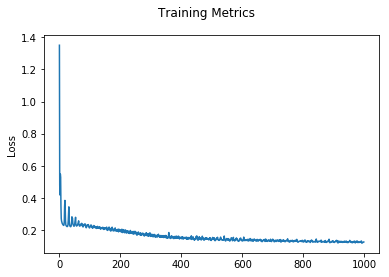

In [0]:
fig, axes = plt.subplots(1)
fig.suptitle('Training Metrics')

axes.set_ylabel("Loss")
axes.plot(train_loss_results)

plt.show()

Let's check the accuracy for test set.

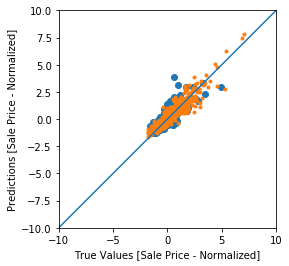

In [0]:
test_predictions = model.predict(normed_test_data).flatten()
training_predictions = model.predict(normed_train_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(normed_test_labels, test_predictions)
plt.scatter(normed_train_labels, training_predictions, marker='.')
plt.xlabel('True Values [Sale Price - Normalized]')
plt.ylabel('Predictions [Sale Price - Normalized]')
lims = [-10,10]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

As we can see, the prediction is not so accurate. Maybe because of overfitting or too small number of features were used for the prediction. <br> At least, we could check the network works.

네트워크로 예측한 값의 정확도가 그리 좋지는 않네요. 오버피팅 + 적은 수의 Feature 개수 때문인 것으로 생각됩니다.